##  Isolation Forest Anomaly Detection

In [4]:
import pandas as pd
df = pd.read_csv('healthcare.csv')
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


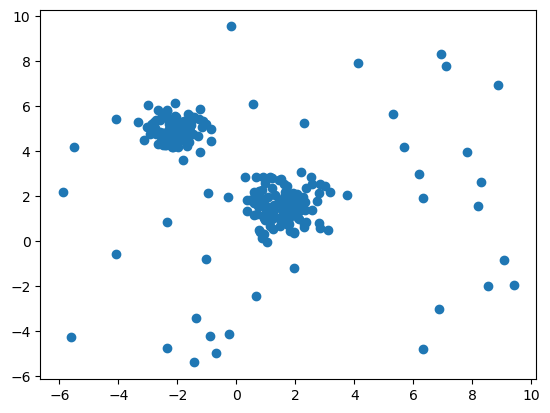

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0], df.iloc[:,1])

In [6]:
from sklearn.ensemble import IsolationForest

In [7]:
clf = IsolationForest(contamination=0.2)
clf.fit(df)
predictions = clf.predict(df)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [8]:
predictions

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

In [9]:
import numpy as np
index = np.where(predictions < 0)
index

(array([  4,  20,  24,  31,  45,  48,  49,  53,  55,  61,  63,  67,  72,
         74,  78,  83,  85,  87,  89,  92,  97, 104, 108, 114, 119, 126,
        130, 132, 133, 141, 151, 160, 167, 177, 179, 181, 182, 187, 197,
        199, 204, 209, 212, 217, 220, 221, 227, 242, 247, 248]),)

In [10]:
x=df.values

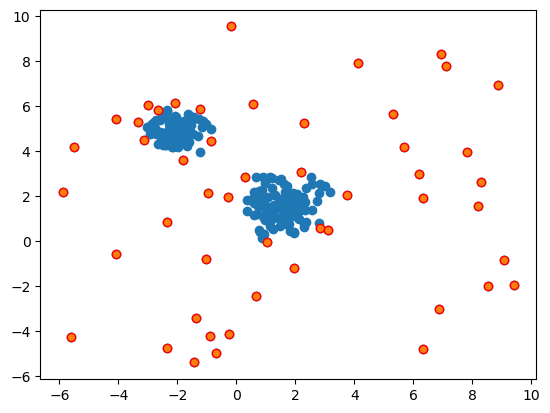

In [11]:
index = np.where(predictions < 0)
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(x[index,0], x[index,1], edgecolors="r")

## DBSCAN Clutering

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [2]:
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)

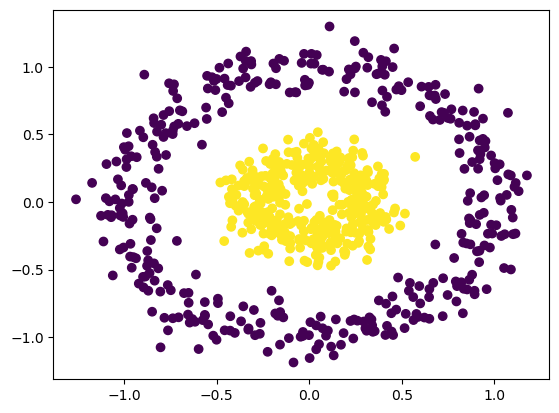

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)

In [9]:
from sklearn.cluster import DBSCAN

In [10]:
dbcan=DBSCAN(eps=0.1)

In [11]:
dbcan.fit_predict(X)

array([ 0,  1,  2,  3,  4,  3,  5,  8,  2,  3,  3,  3,  6,  5,  3,  3,  7,
       13,  3,  3,  4,  3,  3,  3,  8,  3,  3,  3,  4,  3,  2,  3,  2,  3,
        3,  3, -1, -1,  3,  3,  9, 10,  4,  7,  2,  0,  3,  3,  3,  3,  5,
        4, -1,  3,  4,  3,  6,  3,  3,  3, -1,  3,  3,  4,  3,  3,  4,  3,
        3,  5,  3,  3,  2, 11,  3,  3,  7,  4,  3,  3,  3, 10,  4,  3,  4,
        7,  3,  5,  3,  5,  2,  4,  4,  7,  3,  6,  3,  8,  3,  3,  3,  4,
        2,  3,  7,  8,  3,  2,  5,  8,  3, -1,  2,  4,  3,  5, 11,  3,  2,
        2,  3, 11,  3,  2,  5,  4,  3,  0,  3,  3,  3,  6,  2,  3,  3,  3,
        2, -1,  4,  6,  8,  3,  3, -1,  3,  3,  3, -1,  3,  8,  3,  3, 10,
        5,  3,  6,  3,  3,  3,  3,  3, -1,  3,  3,  1,  3,  4,  3,  2,  8,
        3,  0,  3,  0,  2,  3,  3,  3, -1,  3,  3,  3, 10,  3,  0,  2,  3,
        9,  3,  0,  3,  2,  2,  9,  3,  3, -1,  3,  9,  2,  4, -1,  5,  3,
       -1,  7,  3,  5,  3,  7,  4, 10,  4,  8,  8, -1, 12,  8, 11,  3,  3,
        3,  9,  3,  3,  3

In [7]:
dbcan.labels_

array([ 0,  1,  2,  3,  4,  3,  5,  8,  2,  3,  3,  3,  6,  5,  3,  3,  7,
       13,  3,  3,  4,  3,  3,  3,  8,  3,  3,  3,  4,  3,  2,  3,  2,  3,
        3,  3, -1, -1,  3,  3,  9, 10,  4,  7,  2,  0,  3,  3,  3,  3,  5,
        4, -1,  3,  4,  3,  6,  3,  3,  3, -1,  3,  3,  4,  3,  3,  4,  3,
        3,  5,  3,  3,  2, 11,  3,  3,  7,  4,  3,  3,  3, 10,  4,  3,  4,
        7,  3,  5,  3,  5,  2,  4,  4,  7,  3,  6,  3,  8,  3,  3,  3,  4,
        2,  3,  7,  8,  3,  2,  5,  8,  3, -1,  2,  4,  3,  5, 11,  3,  2,
        2,  3, 11,  3,  2,  5,  4,  3,  0,  3,  3,  3,  6,  2,  3,  3,  3,
        2, -1,  4,  6,  8,  3,  3, -1,  3,  3,  3, -1,  3,  8,  3,  3, 10,
        5,  3,  6,  3,  3,  3,  3,  3, -1,  3,  3,  1,  3,  4,  3,  2,  8,
        3,  0,  3,  0,  2,  3,  3,  3, -1,  3,  3,  3, 10,  3,  0,  2,  3,
        9,  3,  0,  3,  2,  2,  9,  3,  3, -1,  3,  9,  2,  4, -1,  5,  3,
       -1,  7,  3,  5,  3,  7,  4, 10,  4,  8,  8, -1, 12,  8, 11,  3,  3,
        3,  9,  3,  3,  3

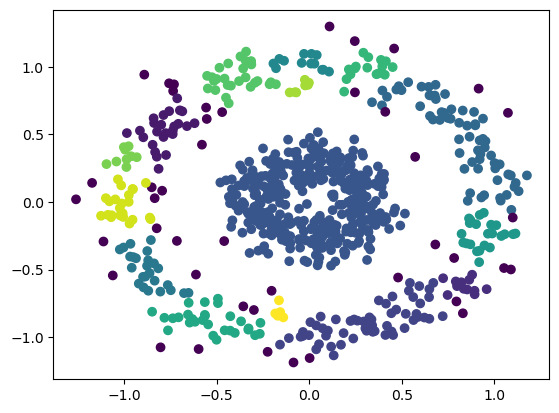

In [12]:
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_)

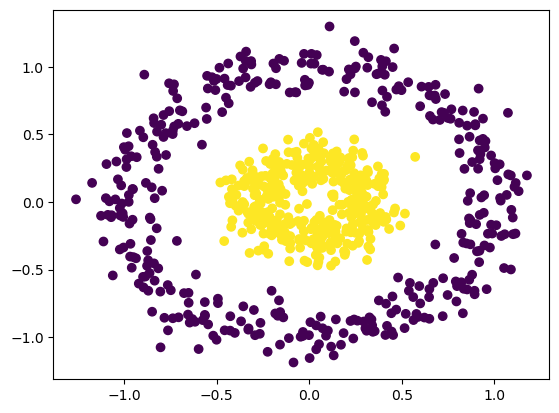

In [13]:
plt.scatter(X[:,0],X[:,1],c=y)